## import libraries

In [1]:
!pip install scikit-spatial==3.0.0

     |████████████████████████████████| 61kB 3.1MB/s 


In [2]:
import numpy as np
from skspatial.objects import Vector
import matplotlib.pyplot as plt
from bisect import bisect_right, bisect_left
import math

## star shaped polygon class definition

In [93]:
class StarPoly:
    # x_axis direction vector
    x_axis = Vector([1,0])
    
    # warning: if lists and variables are defined here, they will not be removed from memory in new instantiations
    # so in every instance they will be there (like a global object for all instances)
    # shortly they will be static

    def __init__(self, s):
        # list of upper points
        self.ulist = []
        # list of lower points
        self.dlist = []
        
        # list of upper points angles
        self.aulist = []
        # list of lower points angles
        self.adlist = []
        
        # s is start point
        self.s = np.array(s)
    
    def x_axis_angle(self, p):
        """
        :param p: a point
        :return: angle between (p-s) vector and x-axis
        """
        v = Vector(p-self.s)
        return np.degrees(self.x_axis.angle_signed(v)).round()
    
    
    def add(self, p):
        """
        :param p: new point to add 
        :return: void
        """
        # convert if p is a list object
        p = np.array(p)

        # angle of p with x-axis
        angle = self.x_axis_angle(p)
        if angle == 180:
          angle = -angle

        # plist and alist are pointers to either ulist,aulist or dlist,adlist
        # for readibality and comfortability
        plist, alist = None, None
        if angle < 0:
          plist = self.dlist
          alist = self.adlist
        else:
          plist = self.ulist
          alist = self.aulist
        # if p is second point of polygon just connect it to s
        if len(plist) == 0:
            plist.append(p)
            alist.append(angle)
            return
        
        # prev and next are indeces of previous and next vertices in polygon
        prev = 0
        next = 0
        
        # get index of largest angle smaller than angle of p (rightmost one)
        # here we use binary search
        prev = bisect_right(alist, angle)-1
        
        # check if angle of p is biggest angle in plist
        if prev+1 < len(alist):
            next = prev+1
        # if points where in same side and same direction, order them by their vector norm
        while prev>=0 and (alist[prev] == angle) and (np.linalg.norm(Vector(plist[prev]-self.s))>np.linalg.norm(Vector(p-self.s))):
          prev-=1
          next-=1

        
        # if p dosn't have biggest angle, add it in its place inside list
        # else add it to the end or beginning of of the list
        if prev < next:
          plist.insert(next, p)
          alist.insert(next, angle)
        elif prev < 0 and next < 0:
          plist.insert(0, p)
          alist.insert(0, angle)
        else:
          plist.append(p)
          alist.append(angle)
        
    # plot polygon
    def plot(self):
      poly = None
      if len(self.ulist) == 0:
        poly = np.concatenate(([self.s],self.dlist))
      elif len(self.dlist) == 0:
        poly = np.concatenate(([self.s],self.ulist))
      else:
        # get vector of first and last points (from s) in both lists
        u1 = Vector(self.ulist[0]-self.s)
        d1 = Vector(self.dlist[0]-self.s)
        un = Vector(self.ulist[len(self.ulist)-1]-self.s)
        dn = Vector(self.dlist[len(self.dlist)-1]-self.s)
        # compute angle between begining and ending edges of upper and lower starshapes 
        a1 = u1.angle_between(dn)
        a2 = un.angle_between(d1)
        if u1.angle_between(un) == 0:
          poly = np.concatenate(([self.s],self.dlist,self.ulist[::-1]))
        elif d1.angle_between(dn) == 0:
          poly = np.concatenate(([self.s],self.ulist,self.dlist[::-1]))
        elif a1 < a2:
          poly = np.concatenate(([self.s],self.dlist,self.ulist))
        else:
          poly = np.concatenate(([self.s],self.ulist,self.dlist))

      l = len(poly)
      for i in range(-1,l-1):
        x = np.array([poly[i][0],poly[i+1][0]])
        y = np.array([poly[i][1],poly[i+1][1]])
        plt.plot(x, y, 'ko-')
      plt.scatter(self.s[0],self.s[1],c='blue',s=200)
      plt.show()
    
    def print_points_list(self):
      print('upper points')
      for x in zip(self.ulist, self.aulist):
        print(x[0],' - ',x[1])
      print('lower points')
      for x in zip(self.dlist, self.adlist):
        print(x[0],' - ',x[1])

# ((execute algorithm))
# - here we add points to polygon from an array, one by one in a for loop. this way we create star-shaped polygon incrementally

# - we have used 3 examples here, you can change one of them to give your favorite points

# <font color='red'>Note1:</font> to add new point and see the new shape of polygon, simply call star.add(pt) and star.plot() respectively, where pt is a list with two elemnts in [x,y] format.

# <font color='red'>Note2:</font> each time when a point is added to polygon, by calling plot() method, whole shape is drawn in a new figure below previous one



# example 1 - step by step figures

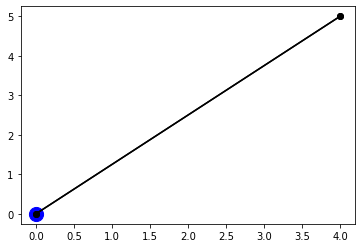

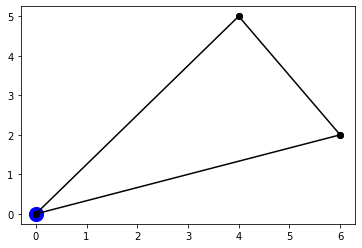

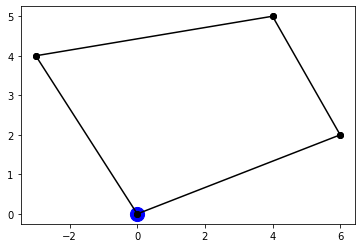

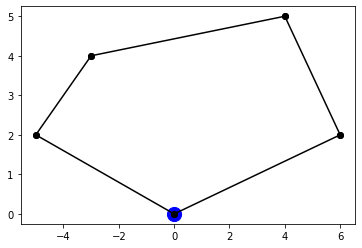

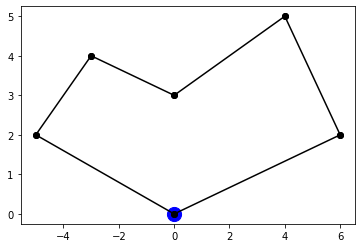

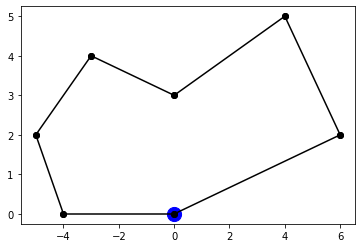

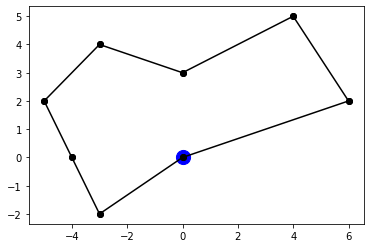

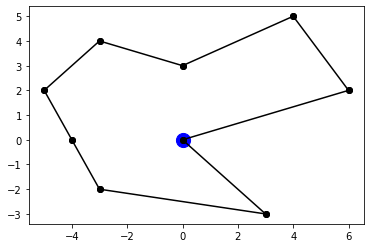

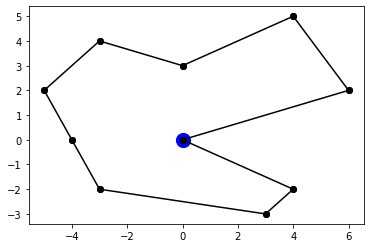

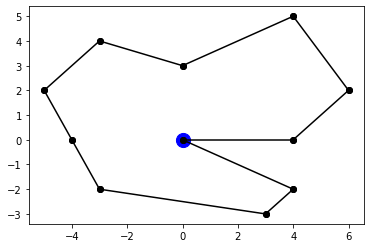

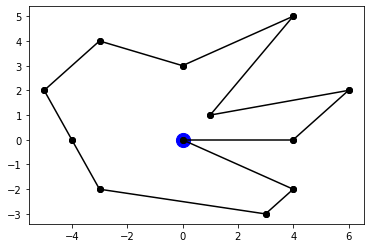

In [94]:
points = [[4,5], 
          [6,2], 
          [-3,4],
          [-5,2],
          [0, 3],
          [-4,0],
          [-3,-2],
          [3,-3],
          [4,-2],
          [4,0], 
          [1,1]]
star = None
star = StarPoly([0,0])

# adding the points from array one by one and show the figure
for x in points:
    star.add(x)
    star.plot()
# star.print_points_list()

# example 2

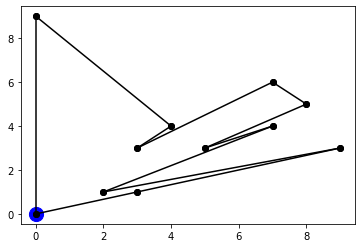

In [95]:
points = [[5, 3],
          [3, 3],
          [0, 9],
          [2, 1],
          [9, 3],
          [7, 4],
          [3, 1],
          [7, 6],
          [4, 4],
          [8, 5]]
# points = np.random.randint(0,10,size=(10,2))
star = None
star = StarPoly([0,0])

# adding the points from array one by one and show the figure
for x in points:
  star.add(x)
star.plot()

# example 3 - randomly generated points

s0:  [-10   8]


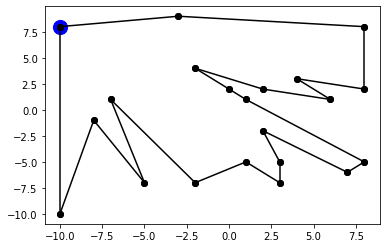

In [91]:
points = np.random.randint(-10,10,size=(20,2))
star = None
s0 = np.random.randint(-10,10,size=(2,))
print('s0: ',s0)
star = StarPoly(s0)

# adding the points from array one by one and show the figure
for x in points:
  star.add(x)
star.plot()